In [1]:
import tweepy
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')

In [2]:
APIkey="PlPYj2O3jdyxtsFMZbNUEchEn"
APISecreatKey="2GsJqKsVimQO3MZgN7gz21Z6rAORDcYe1YgTnHXuFDY8rHcw16"
accessToken="1514933451795087367-SyAI9kistvZAlWlaisSyioRkzfFEDe"
accessTokenSecreat="wSdqQAzL62gnAy5mlytcdy1T5Vadx6xIVFwb1LpmdmGz5"

In [3]:
authenticate = tweepy.OAuthHandler(APIkey,APISecreatKey)
authenticate.set_access_token(accessToken,accessTokenSecreat)
api= tweepy.API(authenticate)

In [4]:
posts= api.user_timeline(screen_name='russiaVSukrain',count=100,tweet_mode='extended')
i=1
for tweet in posts[:10]: 
    print(str(i) + ') ' + tweet.full_text + '\n')
    i= i+1

1) RT @parasguptaaa: Spacex Telecommunications Provider Starlink Internet Speed at Ukraine....

Satellite Internet....

@elonmusk #Ukraine #Uk…

2) RT @russiavsukrain: Clip 60/N

To understanding Ukraine.....

#Russia #Ukraine #YoungSoldier #NATO #UkraineRussia #RussiaArmy #ukrainianArm…

3) RT @russiavsukrain: Clip 61/N

Whole summary in one footage....

#Russia #Ukraine #YoungSoldier #NATO #UkraineRussia #RussiaArmy #Ukrainian…

4) Clip 61/N

Whole summary in one footage....

#Russia #Ukraine #YoungSoldier #NATO #UkraineRussia #RussiaArmy #UkrainianArmy https://t.co/xrXtNTFOgf

5) Clip 60/N

To understanding Ukraine.....

#Russia #Ukraine #YoungSoldier #NATO #UkraineRussia #RussiaArmy #ukrainianArmy #WWIII https://t.co/rmtJG4HnaA

6) RT @russiavsukrain: Clip 46/N

!!SUPER EXCLUSIVE!!

Missile on the way

#Russia #Ukraine #YoungSoldier #NATO #UkraineRussia #RussiaArmy #uk…

7) RT @russiavsukrain: Clip 46/N

Strong Explosion at kharkiv, Ukraine

#Russia #Ukraine #YoungSoldier #NATO #Uk

In [5]:
analysis=TextBlob("Today was the best day ")

In [6]:
analysis.sentiment

Sentiment(polarity=1.0, subjectivity=0.3)

In [7]:
df= pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])
df

,Tweets
0,RT @parasguptaaa: Spacex Telecommunications Pr...
1,RT @russiavsukrain: Clip 60/N\n\nTo understand...
2,RT @russiavsukrain: Clip 61/N\n\nWhole summary...
3,Clip 61/N\n\nWhole summary in one footage....\...
4,Clip 60/N\n\nTo understanding Ukraine.....\n\n...
...,...
95,2/n\n\n🇺🇦 #URGENTE #WWIII #Ucrania #UkraineRus...
96,🇺🇦 #URGENTE #WWIII #Ucrania #UkraineRussiaConf...
97,@minepinetworrk 0xC906011e6F6E29a3989b92a269Dc...
98,@minepinetworrk 0xC906011e6F6E29a3989b92a269Dc...


In [8]:
def cleanTxt(text):
    text= re.sub('@[A-Za-z0-9]+','',text ) #removing mentions
    text= re.sub("#",'',text) #removing #
    text= re.sub('RT[\s]+','',text) # removing Retweets
    text= re.sub('https?:\/\/\S+','',text) #removing links
    return text

In [9]:
df['Tweets']= df['Tweets'].apply(cleanTxt)

In [10]:
df

,Tweets
0,: Spacex Telecommunications Provider Starlink ...
1,: Clip 60/N\n\nTo understanding Ukraine.....\n...
2,: Clip 61/N\n\nWhole summary in one footage......
3,Clip 61/N\n\nWhole summary in one footage....\...
4,Clip 60/N\n\nTo understanding Ukraine.....\n\n...
...,...
95,2/n\n\n🇺🇦 URGENTE WWIII Ucrania UkraineRussiaC...
96,🇺🇦 URGENTE WWIII Ucrania UkraineRussiaConflict...
97,0xC906011e6F6E29a3989b92a269DcC5729d252551\nG...
98,0xC906011e6F6E29a3989b92a269DcC5729d252551


In [11]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# create a function to get the Polarity of all the tweets
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# create 2 columns 'Subjectivity' and 'Polarity'
df['Subjectivity']= df['Tweets'].apply(getSubjectivity)
df['Polarity']= df['Tweets'].apply(getPolarity)

In [12]:
df

,Tweets,Subjectivity,Polarity
0,: Spacex Telecommunications Provider Starlink ...,0.000000,0.000000
1,: Clip 60/N\n\nTo understanding Ukraine.....\n...,0.000000,0.000000
2,: Clip 61/N\n\nWhole summary in one footage......,0.400000,0.200000
3,Clip 61/N\n\nWhole summary in one footage....\...,0.400000,0.200000
4,Clip 60/N\n\nTo understanding Ukraine.....\n\n...,0.000000,0.000000
...,...,...,...
95,2/n\n\n🇺🇦 URGENTE WWIII Ucrania UkraineRussiaC...,0.000000,0.000000
96,🇺🇦 URGENTE WWIII Ucrania UkraineRussiaConflict...,0.000000,0.000000
97,0xC906011e6F6E29a3989b92a269DcC5729d252551\nG...,0.783333,0.766667
98,0xC906011e6F6E29a3989b92a269DcC5729d252551,0.000000,0.000000


In [13]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis']= df['Polarity'].apply(getAnalysis)
df


,Tweets,Subjectivity,Polarity,Analysis
0,: Spacex Telecommunications Provider Starlink ...,0.000000,0.000000,Neutral
1,: Clip 60/N\n\nTo understanding Ukraine.....\n...,0.000000,0.000000,Neutral
2,: Clip 61/N\n\nWhole summary in one footage......,0.400000,0.200000,Positive
3,Clip 61/N\n\nWhole summary in one footage....\...,0.400000,0.200000,Positive
4,Clip 60/N\n\nTo understanding Ukraine.....\n\n...,0.000000,0.000000,Neutral
...,...,...,...,...
95,2/n\n\n🇺🇦 URGENTE WWIII Ucrania UkraineRussiaC...,0.000000,0.000000,Neutral
96,🇺🇦 URGENTE WWIII Ucrania UkraineRussiaConflict...,0.000000,0.000000,Neutral
97,0xC906011e6F6E29a3989b92a269DcC5729d252551\nG...,0.783333,0.766667,Positive
98,0xC906011e6F6E29a3989b92a269DcC5729d252551,0.000000,0.000000,Neutral


In [14]:
df[df['Analysis']=='Neutral']

,Tweets,Subjectivity,Polarity,Analysis
0,: Spacex Telecommunications Provider Starlink ...,0.0,0.0,Neutral
1,: Clip 60/N\n\nTo understanding Ukraine.....\n...,0.0,0.0,Neutral
4,Clip 60/N\n\nTo understanding Ukraine.....\n\n...,0.0,0.0,Neutral
7,: Clip 46/N\n\nCasualties\n\nRussia Ukraine Yo...,0.0,0.0,Neutral
8,: Clip 45/N\n\nRussia Ukraine YoungSoldier NAT...,0.0,0.0,Neutral
...,...,...,...,...
94,3/n\n\n🇺🇦 URGENTE WWIII Ucrania UkraineRussiaC...,0.0,0.0,Neutral
95,2/n\n\n🇺🇦 URGENTE WWIII Ucrania UkraineRussiaC...,0.0,0.0,Neutral
96,🇺🇦 URGENTE WWIII Ucrania UkraineRussiaConflict...,0.0,0.0,Neutral
98,0xC906011e6F6E29a3989b92a269DcC5729d252551,0.0,0.0,Neutral


In [15]:
df['Analysis'].value_counts()

Neutral     70
Positive    25
Negative     5
Name: Analysis, dtype: int64

In [16]:
df.shape

(100, 4)

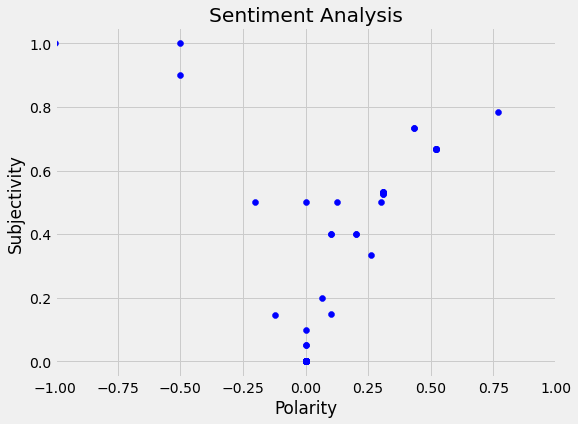

In [17]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
    
plt.title("Sentiment Analysis")
plt.xlim(-1,1)
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

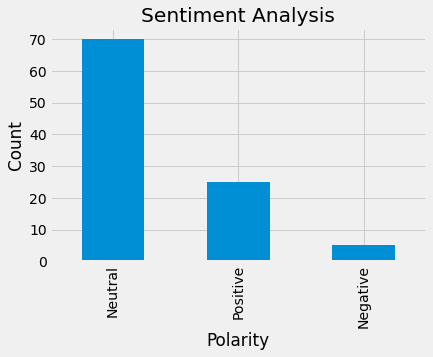

In [18]:
df['Analysis'].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()

# POSITIVE TWEET ONLY

In [19]:
i=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for j in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][j]=='Positive'):
        print(str(i)+ ') ' + sortedDF['Tweets'][j])
        print()
        i=i+1

1) : Clip 61/N

Whole summary in one footage....

Russia Ukraine YoungSoldier NATO UkraineRussia RussiaArmy Ukrainian…

2) Clip 61/N

Whole summary in one footage....

Russia Ukraine YoungSoldier NATO UkraineRussia RussiaArmy UkrainianArmy 

3) : Clip 46/N

!!SUPER EXCLUSIVE!!

Missile on the way

Russia Ukraine YoungSoldier NATO UkraineRussia RussiaArmy uk…

4) : Clip 46/N

Strong Explosion at kharkiv, Ukraine

Russia Ukraine YoungSoldier NATO UkraineRussia RussiaArmy ukrai…

5) Clip 53/N

!!SUPER EXCLUSIVE!!

Missile on the way

Russia Ukraine YoungSoldier NATO UkraineRussia RussiaArmy ukrainianArmy WWIII 

6) Clip 46/N

!!SUPER EXCLUSIVE!!

Missile on the way

Russia Ukraine YoungSoldier NATO UkraineRussia RussiaArmy ukrainianArmy WWIII 

7) Clip 46/N

Strong Explosion at kharkiv, Ukraine

Russia Ukraine YoungSoldier NATO UkraineRussia RussiaArmy ukrainianArmy WWIII 

8) Clip 39/N
An young 18 year old Russian Soldier captured by Ukraine Army.

Russia Ukraine YoungSoldier NATO Ukrain

# NEGATIVE TWEET ONLY

In [20]:
i=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for j in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][j]=='Negative'):
        print(str(i)+ ') ' + sortedDF['Tweets'][j])
        print()
        i=i+1

1) Clip 36/n

Vladimir Putin warns Joe Biden in case of external interference in the Russia-Ukraine conflict: "Our people must know that Russia response will be immediate and will lead to consequences that you have never experienced in your history."

Russia  USA Putin JoeBiden 

2) Clip 35/n

Ukrainian post at Snake Island in the Black Sea told Russian warship to "go f*** yourself" after being told to surrender. The 13 service members were killed.

Russia Ukraine SnakeIsland BlackSea RussiaUkraineCrisis RussiaUkraineConflict  WWIII 

3)  Internet issue sorry......

4) Clip 20/n

Missile attack on car accused 14 year girld lead to death.... This is terrible

URGENTE WWIII Ucrania UkraineRussiaConflict  Ukraine Ucrania 

5)  Not nuclear.... It's keyword in wrong place



# NEUTRAL TWEET ONLY

In [21]:
i=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for j in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][j]=='Neutral'):
        print(str(i)+ ') ' + sortedDF['Tweets'][j])
        print()
        i=i+1

1) : Spacex Telecommunications Provider Starlink Internet Speed at Ukraine....

Satellite Internet....

 Ukraine Uk…

2) : Clip 60/N

To understanding Ukraine.....

Russia Ukraine YoungSoldier NATO UkraineRussia RussiaArmy ukrainianArm…

3) Clip 60/N

To understanding Ukraine.....

Russia Ukraine YoungSoldier NATO UkraineRussia RussiaArmy ukrainianArmy WWIII 

4) : Clip 46/N

Casualties

Russia Ukraine YoungSoldier NATO UkraineRussia RussiaArmy ukrainianArmy WWIII 

5) : Clip 45/N

Russia Ukraine YoungSoldier NATO UkraineRussia RussiaArmy ukrainianArmy WWIII 

6) : Clip 44/N

Women confronting with russian soldiers.

Russia Ukraine YoungSoldier NATO UkraineRussia RussiaArmy u…

7) : Clip 43/N

Russia Ukraine YoungSoldier NATO UkraineRussia RussiaArmy ukrainianArmy WWIII 

8) : Clip 42/N

Ukrainian Helicopter Attack

Russia Ukraine YoungSoldier NATO UkraineRussia RussiaArmy ukrainianArmy…

9) : Clip 40/N

Footage moments before Ukrainian soldiers defending Serpent Island are targeted by

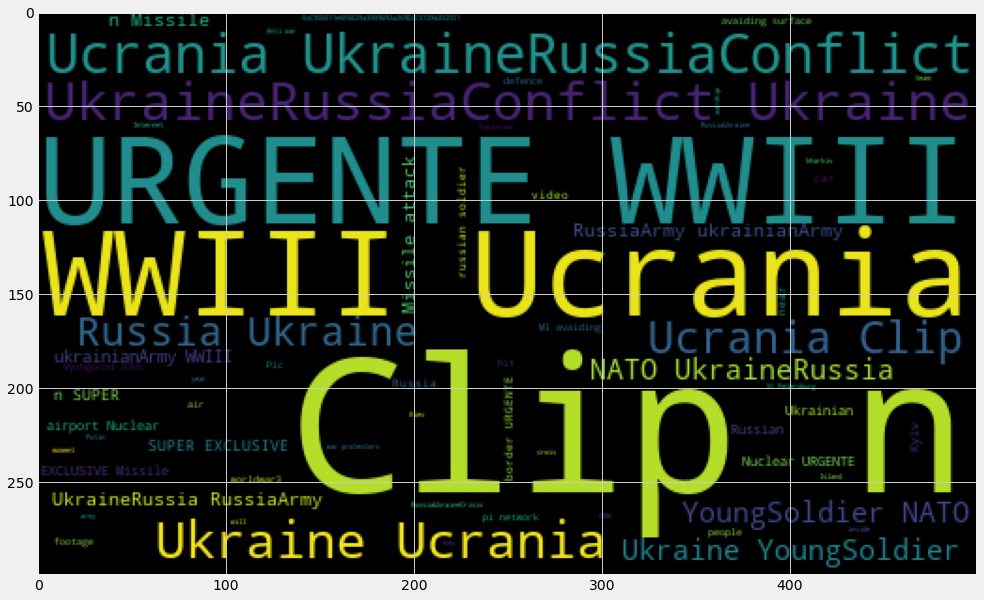

In [26]:
plt.figure(figsize=(15,15))

allwords= ' '.join([i for i in df['Tweets']])
Cloud= WordCloud(width=500,height=300,random_state=0,max_font_size=100).generate(allwords)

plt.imshow(Cloud)
plt.show()